In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Define function
def add_num(x,y):
    sum = x + y
    return sum

In [3]:
# Run function 
add_num(9,11)

20

In [4]:
path =  r"C:\Users\anu10\OneDrive\Instacart Basket Analysis"

path_cf =  r"C:\Users\anu10\OneDrive\Documents\Career foundry Python"

In [5]:
path

'C:\\Users\\anu10\\OneDrive\\Instacart Basket Analysis'

In [6]:
df_ords_prods_merged =pd.read_pickle(os.path.join(path_cf, '02 Data','Prepared Data', 'orders_products_merged.pkl'))

In [7]:
df_ords_prods_merged 

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,both
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,both
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,both
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,13,NaN,10,0,both
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434207,49692,49688,Fresh Foaming Cleanser,73,11,13.5,1788356,200215,prior,2,0,9,5.0,27,0,both
32434208,49692,49688,Fresh Foaming Cleanser,73,11,13.5,3401313,200377,prior,1,4,11,NaN,5,0,both
32434209,49692,49688,Fresh Foaming Cleanser,73,11,13.5,809510,200873,prior,5,3,8,15.0,12,0,both
32434210,49692,49688,Fresh Foaming Cleanser,73,11,13.5,2359893,200873,prior,9,3,15,5.0,11,1,both


In [8]:
# creating subset
df = df_ords_prods_merged[:1000000]

In [9]:
df.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge'],
      dtype='object')

In [10]:
# Define a function

def price_label(row):
    
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices'] > 5) and (row['prices'] <= 15):
        return 'Mid-range product'
    elif row['prices'] > 15:
        return 'High range'
    else: return 'Not enough data'

In [11]:
# Apply the function
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\anu10\AppData\Local\Temp\ipykernel_16128\902492192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [12]:
df['price_range'].value_counts(dropna = False)

Mid-range product    659373
Low-range product    331283
High range             9344
Name: price_range, dtype: int64

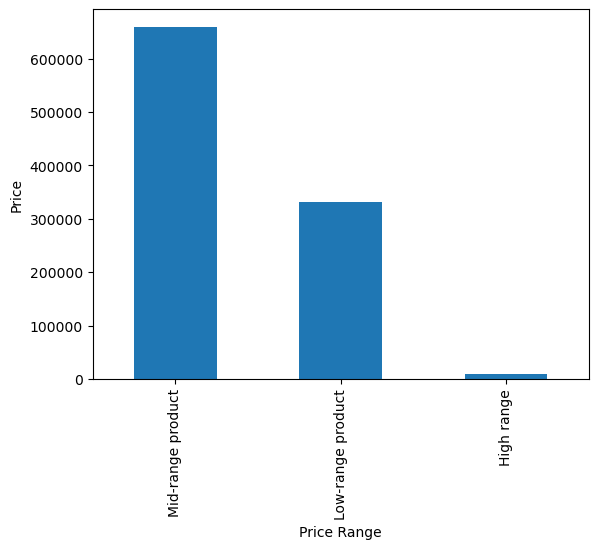

In [13]:
prices_bar =df['price_range'].value_counts(dropna = False).plot.bar(xlabel = 'Price Range', ylabel = 'Price')

In [14]:
df['prices'].max()

24.5

In [15]:
# If statement with loc() function
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High range product'

C:\Users\anu10\AppData\Local\Temp\ipykernel_16128\960828799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High range product'


In [16]:
df.loc[df['prices'] > 15 & (df['prices'] > 5), 'price_range_loc'] = 'Mid range product'

In [17]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low range product'

In [18]:
df['price_range_loc'].value_counts(dropna = False)

Mid range product    668717
Low range product    331283
Name: price_range_loc, dtype: int64

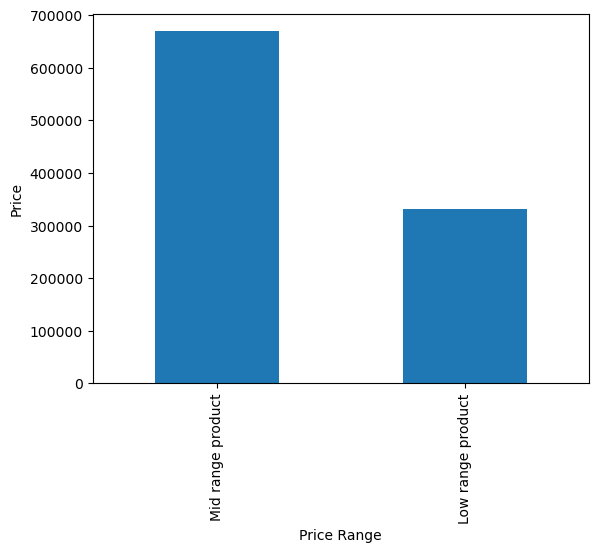

In [19]:
price_bar =df['price_range_loc'].value_counts(dropna = False).plot.bar(xlabel = 'Price Range', ylabel = 'Price')

In [20]:
price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_bar.png'))

In [21]:
# for loop
print("My age is 30")

My age is 30


In [22]:
for x in range(30,45):
    print("My age is %d" % (x))

My age is 30
My age is 31
My age is 32
My age is 33
My age is 34
My age is 35
My age is 36
My age is 37
My age is 38
My age is 39
My age is 40
My age is 41
My age is 42
My age is 43
My age is 44


In [23]:
df_ords_prods_merged.rename(columns = {'order_dow':"orders_day_of_week"},inplace = True)

In [24]:
df_ords_prods_merged.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge'],
      dtype='object')

In [25]:

df_ords_prods_merged['orders_day_of_week'].value_counts(dropna = False)

0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: orders_day_of_week, dtype: int64

In [26]:
result = []

for value in df_ords_prods_merged["orders_day_of_week"]:
    if value==0:
        result.append("Busiest day")
    elif value ==4:
        result.append("Least day")
    else:
        result.append("Regularly busy")
            

In [27]:
result

['Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Least day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Busiest day',
 'Least day',
 'Regularly busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Least day',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Busiest day',
 'Least day',
 'Busiest day',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest 

In [28]:
# creating column busiest day
df_ords_prods_merged['busiest_day'] = result

In [29]:
df_ords_prods_merged.columns


Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'busiest_day'],
      dtype='object')

In [30]:
# 2.creating empty cells
result2 = []

for value in df_ords_prods_merged['orders_day_of_week']:
    if value == 0 or value ==1:
         result2.append('Busiest days')
    elif value == 4 or value == 3:
        result2.append('Slowest days')
    else:
        result2.append('Regularly days')

In [31]:
result2

['Regularly days',
 'Regularly days',
 'Busiest days',
 'Slowest days',
 'Slowest days',
 'Busiest days',
 'Regularly days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Regularly days',
 'Slowest days',
 'Slowest days',
 'Regularly days',
 'Slowest days',
 'Regularly days',
 'Regularly days',
 'Regularly days',
 'Busiest days',
 'Busiest days',
 'Regularly days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Regularly days',
 'Busiest days',
 'Busiest days',
 'Regularly days',
 'Regularly days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Regularly days',
 'Regularly days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Regularly days',
 'Busiest days',
 'Regularly days',
 'Busiest days',
 'Busiest days',

In [32]:
# Creating new column 
df_ords_prods_merged['busiest_days'] = result2

In [33]:
df_ords_prods_merged['busiest_days'].value_counts(dropna = False)

Regularly days    12927461
Busiest days      11875462
Slowest days       7631289
Name: busiest_days, dtype: int64

In [34]:
print("Output of the 'orders_day_of_week' and 'busiest_days' columns:")
print(df_ords_prods_merged[['orders_day_of_week', 'busiest_days']].head(10))


Output of the 'orders_day_of_week' and 'busiest_days' columns:
   orders_day_of_week    busiest_days
0                   6  Regularly days
1                   6  Regularly days
2                   0    Busiest days
3                   3    Slowest days
4                   4    Slowest days
5                   1    Busiest days
6                   2  Regularly days
7                   3    Slowest days
8                   1    Busiest days
9                   1    Busiest days


In [35]:
# creating column busiest period of day
def result3(hour):
    if hour in [10, 11, 14, 15, 13, 12, 16, 9]:
        return 'Most orders'
    elif hour in [23, 6, 0, 1, 5, 2, 4, 3]:
        return 'Fewest orders'
    else:
        return 'Average orders'
df_ords_prods_merged['busiest_period_of_day'] =df_ords_prods_merged['order_hour_of_day'].apply(result3)



In [36]:

# 5. Print the frequency for this new column.
df_ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

Most orders       21137262
Average orders    10006752
Fewest orders      1290198
Name: busiest_period_of_day, dtype: int64

In [37]:
dow_bar = df_ords_prods_merged['orders_day_of_week'].value_counts('Orders').plot.bar(xlabel ='Day of the week', ylabel = 'Orders',title = 'Most busy day of the week'

SyntaxError: unexpected EOF while parsing (1672228877.py, line 1)

In [ ]:
print("Output of the 'orders_day_of_week' ,'busiest_days' and 'busiest_period_of_day' columns:")
print(df_ords_prods_merged[['orders_day_of_week', 'busiest_days','busiest_period_of_day']].head(10))


In [ ]:
dow_bar = df_ords_prods_merged['orders_day_of_week'].value_counts('Orders').plot.bar(xlabel ='Day of the week', ylabel = 'Orders',title = 'Most busy day of the week')

In [ ]:
dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_bar.png'))

In [ ]:
df_ords_prods_merged.head()

In [ ]:
df_ords_prods_merged.to_pickle(os.path.join(path_cf, '02 Data','Prepared Data', 'ords_prods_merged.pkl'))